In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv(r"C:\Users\2023\Downloads\Gold Futures Historical Data.csv")
data.head()

,Date,Close,Open,High,Low,Volume
0,3/9/2015,1166.5,1169.6,1174.4,1164.8,123.61K
1,3/10/2015,1160.1,1165.6,1169.6,1153.8,178.08K
2,3/11/2015,1150.6,1161.1,1164.3,1146.5,161.56K
3,3/12/2015,1151.9,1153.7,1165.7,1147.5,159.54K
4,3/13/2015,1152.4,1152.6,1160.9,1150.4,122.68K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2565 entries, 0 to 2564
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2565 non-null   object 
 1   Close   2565 non-null   float64
 2   Open    2565 non-null   float64
 3   High    2565 non-null   float64
 4   Low     2565 non-null   float64
 5   Volume  2563 non-null   object 
dtypes: float64(4), object(2)
memory usage: 120.4+ KB


In [5]:
data.describe()

,Close,Open,High,Low
count,2565.000000,2565.000000,2565.000000,2565.000000
mean,1634.737349,1634.703801,1645.728612,1623.524815
std,421.655188,421.431332,424.988930,417.878597
min,1049.600000,1051.500000,1062.700000,1045.400000
25%,1271.400000,1271.200000,1277.400000,1265.200000
50%,1629.000000,1627.000000,1646.400000,1611.000000
75%,1892.500000,1893.300000,1904.500000,1876.300000
max,2956.100000,2957.300000,2973.400000,2939.300000


In [6]:
data = data.dropna()
data.isnull().sum()

Date      0
Close     0
Open      0
High      0
Low       0
Volume    0
dtype: int64

In [7]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

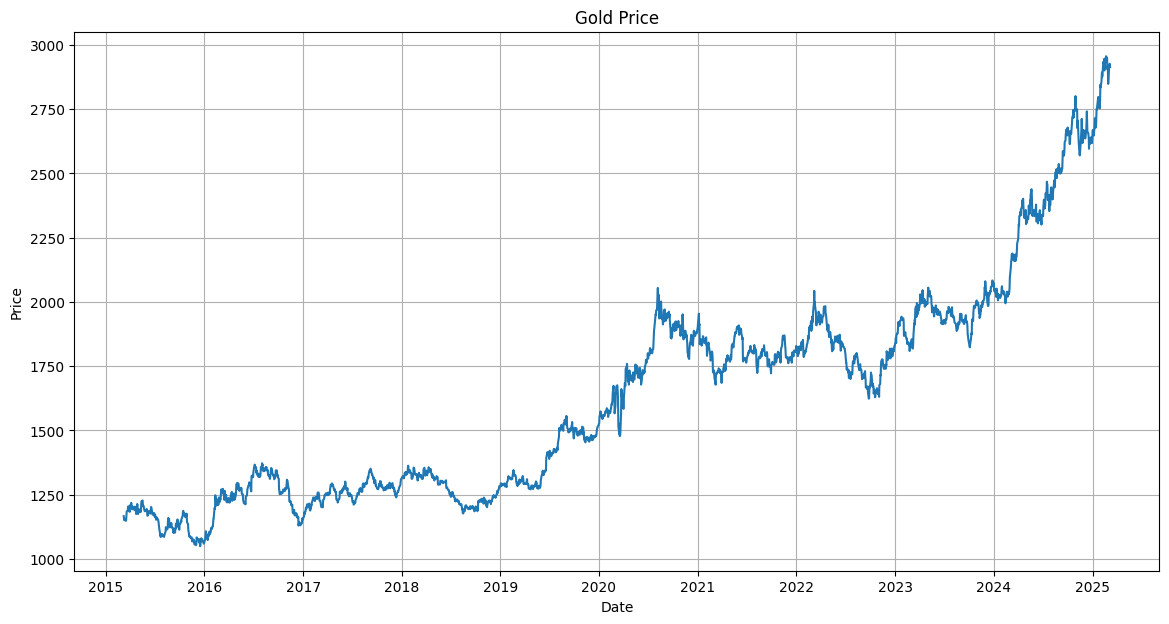

In [8]:
plt.figure(figsize=(14, 7))
plt.plot(data['Close'])
plt.title('Gold Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [157]:
new_data = data.loc['2017/3/1':'2017/9/1']
new_data

,Close,Open,High,Low,Volume
Date,,,,,
2017-03-01,1250.0,1248.5,1251.4,1237.2,318.04K
2017-03-02,1232.9,1249.9,1250.8,1231.1,272.76K
2017-03-03,1226.5,1234.8,1236.7,1223.0,272.29K
2017-03-06,1225.5,1233.9,1237.3,1225.0,156.98K
2017-03-07,1216.1,1225.7,1227.4,1214.1,203.71K
...,...,...,...,...,...
2017-08-28,1315.3,1297.6,1317.8,1297.0,321.81K
2017-08-29,1318.9,1320.5,1331.9,1310.6,460.45K
2017-08-30,1314.1,1314.8,1319.3,1310.1,312.01K


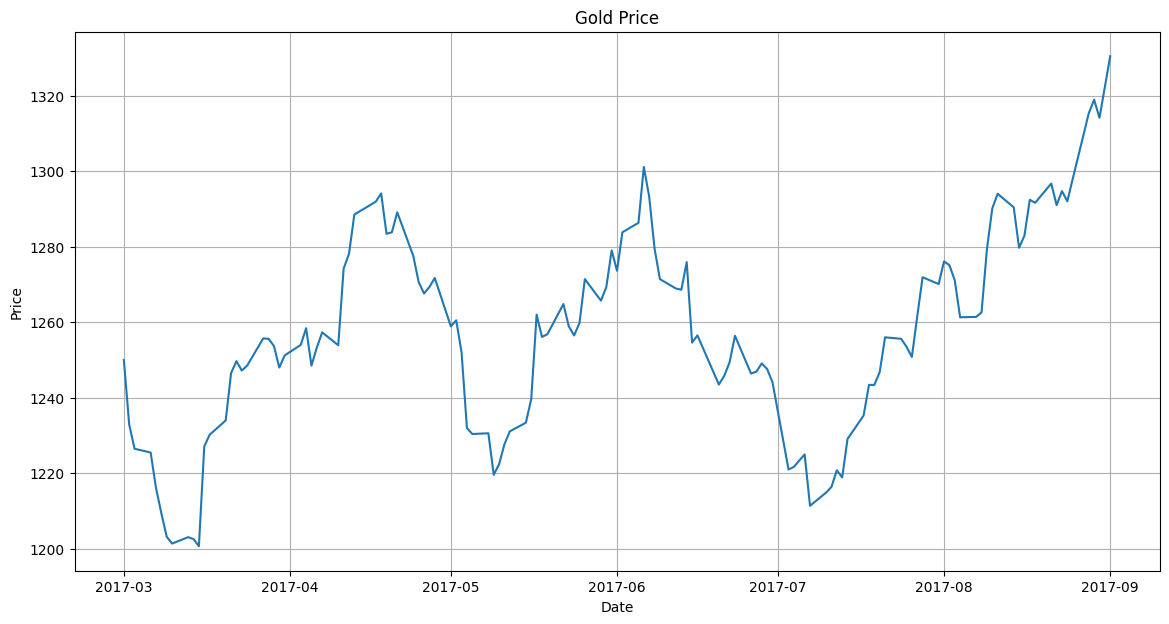

In [158]:
plt.figure(figsize=(14, 7))
plt.plot(new_data['Close'])
plt.title('Gold Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [159]:
from statsmodels.tsa.stattools import adfuller

results = adfuller(new_data['Close'])
results

(np.float64(-0.6407492708479122),
 np.float64(0.8615060123299854),
 0,
 131,
 {'1%': np.float64(-3.481281802271349),
  '5%': np.float64(-2.883867891664528),
  '10%': np.float64(-2.5786771965503177)},
 np.float64(823.4324716081801))

In [160]:
print('ADF Statistics:', results[0])
print('ADF p-value:', results[1])
print('Critical Values:')
for key, value in results[4].items():
    print(f" {key}: {value}")
    
if results[1] <= 0.05:
    print('reject H0')
else:
    print('accept H0 (non-stationary)')


ADF Statistics: -0.6407492708479122
ADF p-value: 0.8615060123299854
Critical Values:
 1%: -3.481281802271349
 5%: -2.883867891664528
 10%: -2.5786771965503177
accept H0 (non-stationary)


In [161]:
import warnings
warnings.filterwarnings('ignore')

new_data['Price_diff'] = new_data['Close'].diff()
new_data = new_data.dropna(subset=['Price_diff'])
result_diff = adfuller(new_data['Price_diff'])

print("ADF Statistic (Diff):", result_diff[0])
print("p-value (Diff):", result_diff[1])
print("Critical Values (Diff):")
for key, value in result_diff[4].items():
    print(f" {key}: {value}")
    
if result_diff[1] <= 0.05:
    print('reject H0')
else:
    print('accept H0 (non-stationary)')

ADF Statistic (Diff): -10.347993309335457
p-value (Diff): 2.5806979974908733e-18
Critical Values (Diff):
 1%: -3.4816817173418295
 5%: -2.8840418343195267
 10%: -2.578770059171598
reject H0


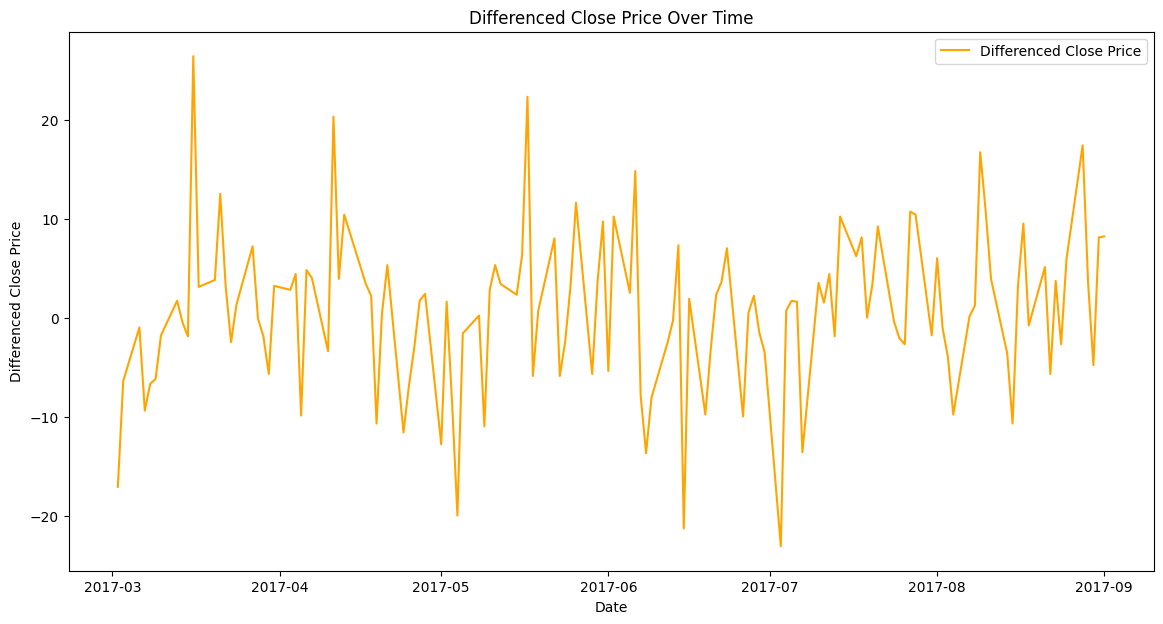

In [162]:
plt.figure(figsize=(14, 7))
plt.plot(new_data.index, new_data['Price_diff'], label='Differenced Close Price', color='orange')
plt.title('Differenced Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.legend()
plt.show()

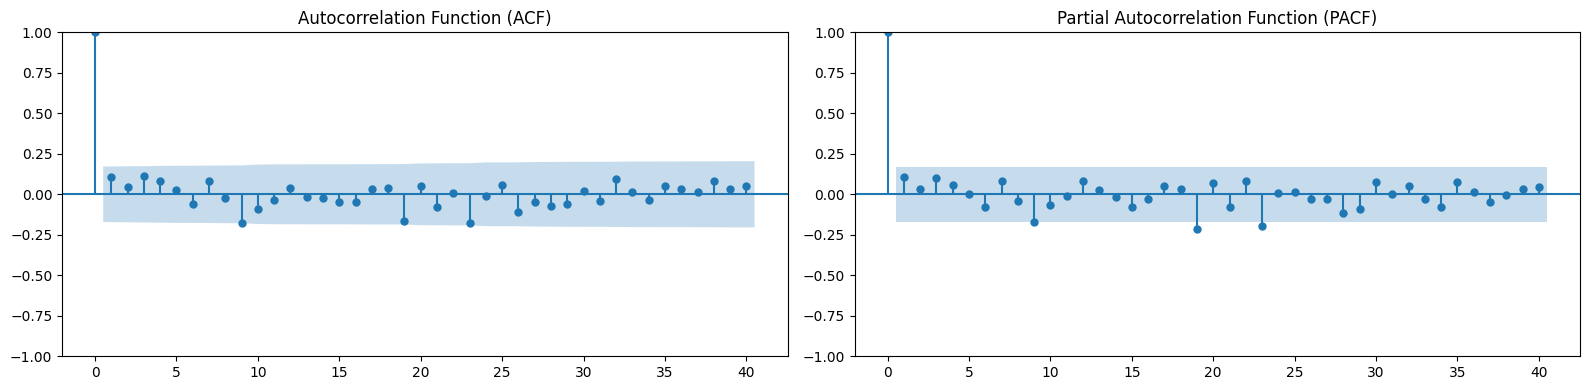

In [163]:
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# 
# plt.figure(figsize=(14, 7))
# plt.subplot(1, 2, 1)
# plot_acf(data['Price_diff'].dropna(), lags=40, ax=plt.gca())
# plt.title('ACF')
# 
# plt.subplot(1, 2, 2)
# plot_pacf(data['Price_diff'].dropna(), lags=40, ax=plt.gca())
# plt.title('PACF')
# 
# plt.tight_layout()
# plt.show()

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(16, 4))

plot_acf(new_data['Price_diff'].dropna(), lags=40, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(new_data['Price_diff'].dropna(), lags=40, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

In [164]:
import itertools 
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

p = range(0, 3)
d = [1]
q = range(0, 3)
pdq_combinations = list(itertools.product(p, d, q))

results = []

for param in pdq_combinations:
    try:
        model = sm.tsa.ARIMA(new_data['Close'], order=param)
        result = model.fit()
        results.append((param, result.aic, result.bic))
        print(f'ARIMA{param} - AIC: {result.aic:.2f} - BIC: {result.bic:.2f}')
    except:
        continue
        
best_model = sorted(results, key=lambda x: x[1])[0]
print(f"best model: \n ARIMA{best_model[0]} - AIC: {best_model[1]:.2f}, BIC: {best_model[2]:.2f}")

ARIMA(0, 1, 0) - AIC: 910.14 - BIC: 913.01
ARIMA(0, 1, 1) - AIC: 910.92 - BIC: 916.65
ARIMA(0, 1, 2) - AIC: 912.77 - BIC: 921.37
ARIMA(1, 1, 0) - AIC: 910.82 - BIC: 916.56
ARIMA(1, 1, 1) - AIC: 911.79 - BIC: 920.39
ARIMA(1, 1, 2) - AIC: 913.76 - BIC: 925.23
ARIMA(2, 1, 0) - AIC: 912.58 - BIC: 921.18
ARIMA(2, 1, 1) - AIC: 913.77 - BIC: 925.24
ARIMA(2, 1, 2) - AIC: 914.47 - BIC: 928.80
best model: 
 ARIMA(0, 1, 0) - AIC: 910.14, BIC: 913.01


In [165]:
train_size = int(len(new_data) * 0.8)
train, test = new_data.iloc[:train_size], new_data.iloc[train_size:]

best_pdq = best_model[0]
model = ARIMA(train['Close'], order=best_pdq)
result = model.fit()

print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  104
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -360.604
Date:                Thu, 17 Apr 2025   AIC                            723.208
Time:                        16:55:29   BIC                            725.843
Sample:                             0   HQIC                           724.275
                                - 104                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        64.3375      6.766      9.510      0.000      51.077      77.598
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):                 9.81
Prob(Q):                              0.55   Pr

In [166]:
# forecast_steps = 30
forecast = result.forecast(steps=len(test))
print(forecast)

104    1250.8
105    1250.8
106    1250.8
107    1250.8
108    1250.8
109    1250.8
110    1250.8
111    1250.8
112    1250.8
113    1250.8
114    1250.8
115    1250.8
116    1250.8
117    1250.8
118    1250.8
119    1250.8
120    1250.8
121    1250.8
122    1250.8
123    1250.8
124    1250.8
125    1250.8
126    1250.8
127    1250.8
128    1250.8
129    1250.8
130    1250.8
Name: predicted_mean, dtype: float64


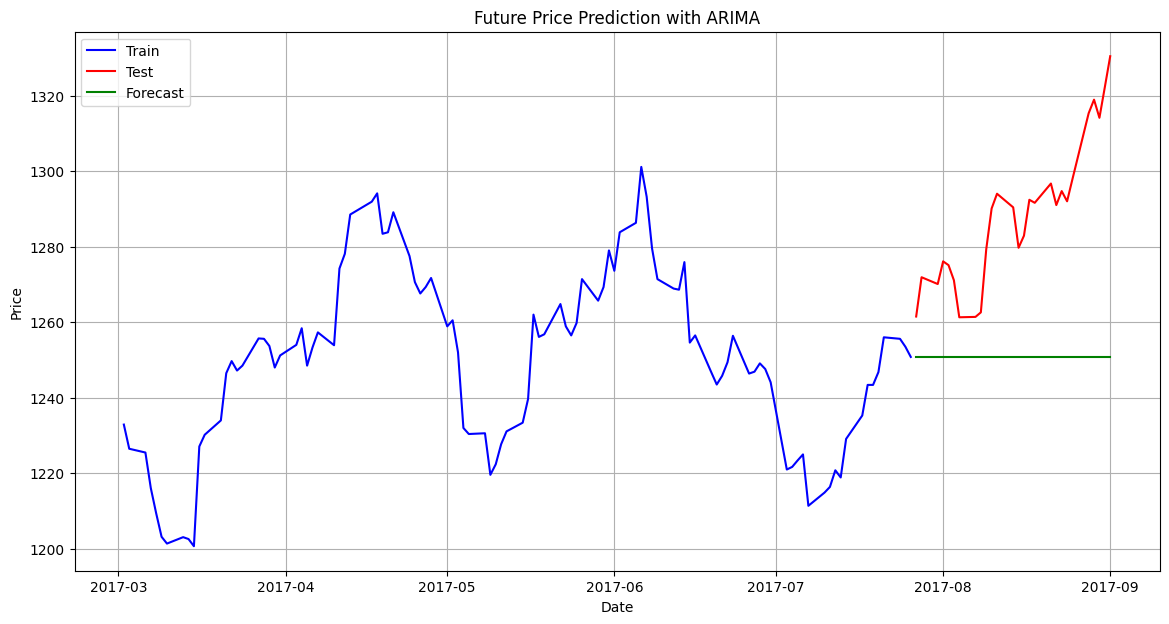

In [167]:
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['Close'], label='Train', color='blue')
plt.plot(test.index, test['Close'], label='Test', color='red')
plt.plot(test.index, forecast, label='Forecast', color='green')
plt.legend()
plt.title('Future Price Prediction with ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

In [168]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(result.resid, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,0.067049,1.0


In [169]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_true=test['Close']
y_pred=forecast

mae = mean_absolute_error(y_true, y_pred)
print(f'MAE: {mae}')
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f'RMSE: {rmse}')
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(f'MAPE: {mape}')

MAE: 37.52222222222227
RMSE: 42.07288649210774
MAPE: nan


In [170]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_2 = SARIMAX(train['Close'], order=(1,0,0), seasonal_order=(1,0,0,7))
result_2 = model_2.fit()
print(result_2.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             Close   No. Observations:                  104
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 7)   Log Likelihood                -369.081
Date:                           Thu, 17 Apr 2025   AIC                            744.162
Time:                                   16:55:42   BIC                            752.095
Sample:                                        0   HQIC                           747.376
                                           - 104                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.001   1545.037      0.000       0.999       1.001
ar.S.L7        0.0356      0.097      0.366

In [171]:
forecast_2 = result_2.forecast(steps=len(test))
print(forecast_2)

104    1251.061315
105    1251.034317
106    1251.128340
107    1251.428811
108    1251.387577
109    1251.285833
110    1251.162734
111    1251.145041
112    1251.117086
113    1251.093439
114    1251.077142
115    1251.048682
116    1251.018069
117    1250.986697
118    1250.959077
119    1250.931092
120    1250.903262
121    1250.875693
122    1250.847693
123    1250.819616
124    1250.791513
125    1250.763544
126    1250.735562
127    1250.707587
128    1250.679622
129    1250.651641
130    1250.623659
Name: predicted_mean, dtype: float64


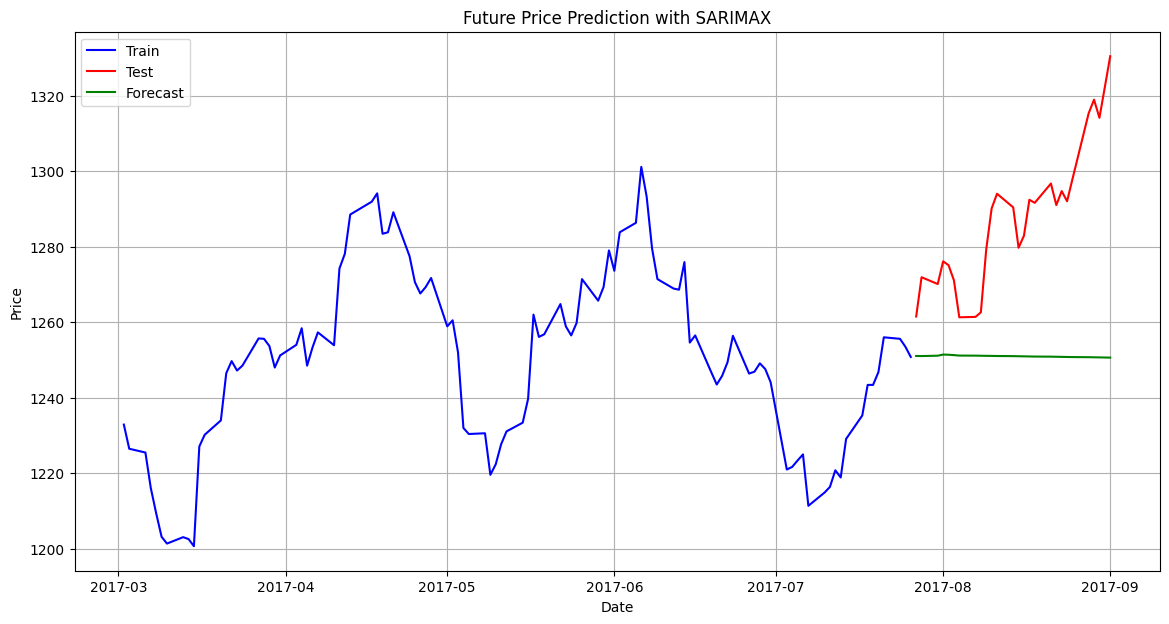

In [172]:
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['Close'], label='Train', color='blue')
plt.plot(test.index, test['Close'], label='Test', color='red')
plt.plot(test.index, forecast_2, label='Forecast', color='green')
plt.legend()
plt.title('Future Price Prediction with SARIMAX')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()